# Import Libraries

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
%matplotlib inline

# Import Data

In [2]:
engine = create_engine('sqlite:///data/mta_data.db')
engine.table_names()

/var/folders/hy/v35lf41x0y53lz7vj63f3qvh0000gn/T/ipykernel_36730/1294246610.py:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['mta_data']

# Access, Investigate, and Prepare the Data

In [3]:
mta_df = pd.read_sql('SELECT * FROM mta_data;', engine)

In [4]:
#Initial inspection of dataset
mta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639743 entries, 0 to 2639742
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 221.5+ MB


In [5]:
#Check for null values
mta_df.isna().sum()

C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

In [6]:
#Closer inspection of data
mta_df.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,00:00:00,REGULAR,6989774,2370411
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,04:00:00,REGULAR,6989795,2370413
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,08:00:00,REGULAR,6989813,2370436
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,12:00:00,REGULAR,6989924,2370512
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,16:00:00,REGULAR,6990200,2370573


In [7]:
#How many rows of data?
row_count = len(mta_df.value_counts().reset_index())
print(f'Number of data rows: {row_count}')

Number of data rows: 2639743


In [8]:
#How many stations?
station_count = len(mta_df['STATION'].unique())
print(f'Number of distinct stations: {station_count}')

Number of distinct stations: 378


In [9]:
#Inspect DATE values
mta_df['DATE'].value_counts().sort_index()

01/01/2019    28742
01/02/2019    28691
01/03/2019    28584
01/04/2019    29388
01/05/2019    28619
              ...  
03/28/2019    28911
03/29/2019    30220
12/29/2018    28591
12/30/2018    28648
12/31/2018    28959
Name: DATE, Length: 91, dtype: int64

In [10]:
#How many days are in the dataset?
dates_count = len(mta_df['DATE'].unique())
print(f'Number of days used in dataset: {dates_count}')

Number of days used in dataset: 91


In [11]:
#Add DATE_TIME column
mta_df['DATE_TIME'] = pd.to_datetime(mta_df['DATE'] + ' ' + mta_df['TIME'], format='%m/%d/%Y %H:%M:%S')

In [12]:
#Add TURNSTILE column to isolate individual turnstiles (combination of C/A, UNIT, SCP) 
mta_df['TURNSTILE'] = mta_df['C/A'] + '-' + mta_df['UNIT'] + '-' + mta_df['SCP']

In [13]:
#Verify updated dataset columns
mta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639743 entries, 0 to 2639742
Data columns (total 13 columns):
 #   Column     Dtype         
---  ------     -----         
 0   C/A        object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DIVISION   object        
 6   DATE       object        
 7   TIME       object        
 8   DESC       object        
 9   ENTRIES    int64         
 10  EXITS      int64         
 11  DATE_TIME  datetime64[ns]
 12  TURNSTILE  object        
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 261.8+ MB


In [14]:
#Upon closer inspection there are turnstile readings (ENTRIES/EXITS) cumulatively recorded every 4 hours
mta_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,00:00:00,REGULAR,6989774,2370411,2019-03-23 00:00:00,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,04:00:00,REGULAR,6989795,2370413,2019-03-23 04:00:00,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,08:00:00,REGULAR,6989813,2370436,2019-03-23 08:00:00,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,12:00:00,REGULAR,6989924,2370512,2019-03-23 12:00:00,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,16:00:00,REGULAR,6990200,2370573,2019-03-23 16:00:00,A002-R051-02-00-00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/23/2019,20:00:00,REGULAR,6990562,2370623,2019-03-23 20:00:00,A002-R051-02-00-00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/24/2019,00:00:00,REGULAR,6990734,2370648,2019-03-24 00:00:00,A002-R051-02-00-00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/24/2019,04:00:00,REGULAR,6990758,2370653,2019-03-24 04:00:00,A002-R051-02-00-00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/24/2019,08:00:00,REGULAR,6990772,2370676,2019-03-24 08:00:00,A002-R051-02-00-00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/24/2019,12:00:00,REGULAR,6990860,2370731,2019-03-24 12:00:00,A002-R051-02-00-00


In [15]:
#Check for turnstile reading duplicates
duplicate_checker = (mta_df
                        .groupby(['STATION', 'TURNSTILE', 'DATE_TIME'])
                        ['ENTRIES'].count()
                        .reset_index()
                        .sort_values('ENTRIES', ascending=False))

duplicate_checker.head(5)

,STATION,TURNSTILE,DATE_TIME,ENTRIES
1087567,B'WAY-LAFAYETTE,N519-R461-00-03-01,2019-03-24 21:00:00,2
285400,207 ST,R188-R037-00-06-02,2019-02-28 07:00:00,2
125780,14 ST-UNION SQ,A034-R170-03-03-00,2019-03-12 17:00:00,2
1087566,B'WAY-LAFAYETTE,N519-R461-00-03-01,2019-03-24 17:00:00,2
705638,57 ST-7 AV,A011-R080-01-00-01,2018-12-30 15:00:00,2


In [16]:
#How many duplicates?
duplicate_count = len(duplicate_checker[duplicate_checker['ENTRIES'] > 1])
print(f'Number of duplicate turnstile recordings found: {duplicate_count}')

Number of duplicate turnstile recordings found: 84


In [17]:
#Drop duplicates
mta_df.drop_duplicates(subset=['STATION', 'TURNSTILE', 'DATE_TIME'], inplace=True)

In [18]:
#Check for duplicates, again
(mta_df
    .groupby(['STATION', 'TURNSTILE', 'DATE_TIME'])
    ['ENTRIES'].count()
    .reset_index()
    .sort_values('ENTRIES', ascending=False)).head(5)

,STATION,TURNSTILE,DATE_TIME,ENTRIES
0,1 AV,H007-R248-00-00-00,2018-12-29 03:00:00,1
1759746,GRD CNTRL-42 ST,R240-R047-00-03-04,2019-03-12 05:00:00,1
1759768,GRD CNTRL-42 ST,R240-R047-00-03-04,2019-03-15 21:00:00,1
1759769,GRD CNTRL-42 ST,R240-R047-00-03-04,2019-03-16 01:00:00,1
1759770,GRD CNTRL-42 ST,R240-R047-00-03-04,2019-03-16 05:00:00,1


In [19]:
#Sort by STATION, DATE_TIME, TURNSTILE
mta_df.sort_values(['STATION', 'DATE_TIME', 'TURNSTILE'], inplace=True)

In [20]:
mta_df.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE
2468630,H007,R248,00-00-00,1 AV,L,BMT,12/29/2018,03:00:00,REGULAR,14269844,15995700,2018-12-29 03:00:00,H007-R248-00-00-00
2468672,H007,R248,00-00-01,1 AV,L,BMT,12/29/2018,03:00:00,REGULAR,59748625,37578661,2018-12-29 03:00:00,H007-R248-00-00-01
2468714,H007,R248,00-03-00,1 AV,L,BMT,12/29/2018,03:00:00,REGULAR,370534751,387624056,2018-12-29 03:00:00,H007-R248-00-03-00
2468756,H007,R248,00-03-01,1 AV,L,BMT,12/29/2018,03:00:00,REGULAR,2350301,1005946,2018-12-29 03:00:00,H007-R248-00-03-01
2468798,H007,R248,00-03-02,1 AV,L,BMT,12/29/2018,03:00:00,REGULAR,6234476,524455,2018-12-29 03:00:00,H007-R248-00-03-02


In [21]:
# Drop DESC, LINENAME, DIVISION
mta_df = mta_df.drop(['DESC', 'LINENAME', 'DIVISION'], axis=1, errors='ignore')
mta_df.head(5)

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,TURNSTILE
2468630,H007,R248,00-00-00,1 AV,12/29/2018,03:00:00,14269844,15995700,2018-12-29 03:00:00,H007-R248-00-00-00
2468672,H007,R248,00-00-01,1 AV,12/29/2018,03:00:00,59748625,37578661,2018-12-29 03:00:00,H007-R248-00-00-01
2468714,H007,R248,00-03-00,1 AV,12/29/2018,03:00:00,370534751,387624056,2018-12-29 03:00:00,H007-R248-00-03-00
2468756,H007,R248,00-03-01,1 AV,12/29/2018,03:00:00,2350301,1005946,2018-12-29 03:00:00,H007-R248-00-03-01
2468798,H007,R248,00-03-02,1 AV,12/29/2018,03:00:00,6234476,524455,2018-12-29 03:00:00,H007-R248-00-03-02


In [22]:
#How many unique turnstiles?
turnstile_count = len(mta_df['TURNSTILE'].unique())
print(f'Number of unique turnstiles: {turnstile_count}')

Number of unique turnstiles: 4906


# Analyzing Entry/Exit Data (4AM-12PM, MON-FRI)

In [23]:
mta_df.head(5)

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,TURNSTILE
2468630,H007,R248,00-00-00,1 AV,12/29/2018,03:00:00,14269844,15995700,2018-12-29 03:00:00,H007-R248-00-00-00
2468672,H007,R248,00-00-01,1 AV,12/29/2018,03:00:00,59748625,37578661,2018-12-29 03:00:00,H007-R248-00-00-01
2468714,H007,R248,00-03-00,1 AV,12/29/2018,03:00:00,370534751,387624056,2018-12-29 03:00:00,H007-R248-00-03-00
2468756,H007,R248,00-03-01,1 AV,12/29/2018,03:00:00,2350301,1005946,2018-12-29 03:00:00,H007-R248-00-03-01
2468798,H007,R248,00-03-02,1 AV,12/29/2018,03:00:00,6234476,524455,2018-12-29 03:00:00,H007-R248-00-03-02


In [24]:
#Add DAY, HOUR columns
mta_df['DAY'] = mta_df['DATE_TIME'].dt.day_name()
mta_df['HOUR'] = mta_df['DATE_TIME'].dt.hour

In [25]:
mta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2639659 entries, 2468630 to 179888
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   C/A        object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   DATE       object        
 5   TIME       object        
 6   ENTRIES    int64         
 7   EXITS      int64         
 8   DATE_TIME  datetime64[ns]
 9   TURNSTILE  object        
 10  DAY        object        
 11  HOUR       int64         
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 261.8+ MB


In [26]:
mta_df.head(5)

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,TURNSTILE,DAY,HOUR
2468630,H007,R248,00-00-00,1 AV,12/29/2018,03:00:00,14269844,15995700,2018-12-29 03:00:00,H007-R248-00-00-00,Saturday,3
2468672,H007,R248,00-00-01,1 AV,12/29/2018,03:00:00,59748625,37578661,2018-12-29 03:00:00,H007-R248-00-00-01,Saturday,3
2468714,H007,R248,00-03-00,1 AV,12/29/2018,03:00:00,370534751,387624056,2018-12-29 03:00:00,H007-R248-00-03-00,Saturday,3
2468756,H007,R248,00-03-01,1 AV,12/29/2018,03:00:00,2350301,1005946,2018-12-29 03:00:00,H007-R248-00-03-01,Saturday,3
2468798,H007,R248,00-03-02,1 AV,12/29/2018,03:00:00,6234476,524455,2018-12-29 03:00:00,H007-R248-00-03-02,Saturday,3


In [27]:
#Using weekday data only
weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday']
mta_weekday = mta_df[mta_df['DAY'].isin(weekday)]
mta_weekday['DAY'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype=object)

In [28]:
#Convert DAY to categorical data
weekday_type = CategoricalDtype(categories=weekday, ordered=True)
mta_weekday['DAY'] = mta_weekday['DAY'].astype(weekday_type)

/var/folders/hy/v35lf41x0y53lz7vj63f3qvh0000gn/T/ipykernel_36730/810788658.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_weekday['DAY'] = mta_weekday['DAY'].astype(weekday_type)


In [29]:
#Using weeday data between the hours of 4AM and 12PM
mta_weekday_am = mta_weekday[(4 <= mta_weekday['HOUR']) & (mta_weekday['HOUR'] <= 12)]
mta_weekday_am['HOUR'].unique()

array([ 7, 11,  9,  8, 10,  4, 12,  5,  6])

In [30]:
mta_weekday_am.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775255 entries, 2468643 to 179885
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   C/A        775255 non-null  object        
 1   UNIT       775255 non-null  object        
 2   SCP        775255 non-null  object        
 3   STATION    775255 non-null  object        
 4   DATE       775255 non-null  object        
 5   TIME       775255 non-null  object        
 6   ENTRIES    775255 non-null  int64         
 7   EXITS      775255 non-null  int64         
 8   DATE_TIME  775255 non-null  datetime64[ns]
 9   TURNSTILE  775255 non-null  object        
 10  DAY        775255 non-null  category      
 11  HOUR       775255 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(3), object(7)
memory usage: 71.7+ MB


In [31]:
mta_weekday_am.head(5)

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,TURNSTILE,DAY,HOUR
2468643,H007,R248,00-00-00,1 AV,12/31/2018,07:00:00,14273850,16002066,2018-12-31 07:00:00,H007-R248-00-00-00,Monday,7
2468685,H007,R248,00-00-01,1 AV,12/31/2018,07:00:00,59754202,37581917,2018-12-31 07:00:00,H007-R248-00-00-01,Monday,7
2468727,H007,R248,00-03-00,1 AV,12/31/2018,07:00:00,370535932,387625980,2018-12-31 07:00:00,H007-R248-00-03-00,Monday,7
2468769,H007,R248,00-03-01,1 AV,12/31/2018,07:00:00,2351325,1006594,2018-12-31 07:00:00,H007-R248-00-03-01,Monday,7
2468811,H007,R248,00-03-02,1 AV,12/31/2018,07:00:00,6236288,524681,2018-12-31 07:00:00,H007-R248-00-03-02,Monday,7


In [32]:
#Add PREV_DATE, PREV_ENTRIES, PREV_EXITS columns to calculate ENTRIES and EXITS value difference
mta_weekday_am[['PREV_DATE', 'PREV_ENTRIES', 'PREV_EXITS']] = (mta_weekday_am
                                                                .groupby(['STATION', 'TURNSTILE'])['DATE', 'ENTRIES', 'EXITS']
                                                                .apply(lambda grp: grp.shift(1)))

mta_weekday_am.head(5)

/var/folders/hy/v35lf41x0y53lz7vj63f3qvh0000gn/T/ipykernel_36730/1501641569.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mta_weekday_am[['PREV_DATE', 'PREV_ENTRIES', 'PREV_EXITS']] = (mta_weekday_am
/Users/trihle/Applications/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,TURNSTILE,DAY,HOUR,PREV_DATE,PREV_ENTRIES,PREV_EXITS
2468643,H007,R248,00-00-00,1 AV,12/31/2018,07:00:00,14273850,16002066,2018-12-31 07:00:00,H007-R248-00-00-00,Monday,7,NaN,NaN,NaN
2468685,H007,R248,00-00-01,1 AV,12/31/2018,07:00:00,59754202,37581917,2018-12-31 07:00:00,H007-R248-00-00-01,Monday,7,NaN,NaN,NaN
2468727,H007,R248,00-03-00,1 AV,12/31/2018,07:00:00,370535932,387625980,2018-12-31 07:00:00,H007-R248-00-03-00,Monday,7,NaN,NaN,NaN
2468769,H007,R248,00-03-01,1 AV,12/31/2018,07:00:00,2351325,1006594,2018-12-31 07:00:00,H007-R248-00-03-01,Monday,7,NaN,NaN,NaN
2468811,H007,R248,00-03-02,1 AV,12/31/2018,07:00:00,6236288,524681,2018-12-31 07:00:00,H007-R248-00-03-02,Monday,7,NaN,NaN,NaN


In [33]:
#Check for null values
mta_weekday_am.isna().sum()

C/A                0
UNIT               0
SCP                0
STATION            0
DATE               0
TIME               0
ENTRIES            0
EXITS              0
DATE_TIME          0
TURNSTILE          0
DAY                0
HOUR               0
PREV_DATE       4893
PREV_ENTRIES    4893
PREV_EXITS      4893
dtype: int64

In [34]:
#Drop rows with PREV_DATE null values
mta_weekday_am.dropna(subset=['PREV_DATE'], axis=0, inplace=True)

/Users/trihle/Applications/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [35]:
mta_weekday_am.head(5)

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,TURNSTILE,DAY,HOUR,PREV_DATE,PREV_ENTRIES,PREV_EXITS
2468644,H007,R248,00-00-00,1 AV,12/31/2018,11:00:00,14274326,16002964,2018-12-31 11:00:00,H007-R248-00-00-00,Monday,11,12/31/2018,14273850.0,16002066.0
2468686,H007,R248,00-00-01,1 AV,12/31/2018,11:00:00,59754837,37582392,2018-12-31 11:00:00,H007-R248-00-00-01,Monday,11,12/31/2018,59754202.0,37581917.0
2468728,H007,R248,00-03-00,1 AV,12/31/2018,11:00:00,370536044,387626223,2018-12-31 11:00:00,H007-R248-00-03-00,Monday,11,12/31/2018,370535932.0,387625980.0
2468770,H007,R248,00-03-01,1 AV,12/31/2018,11:00:00,2351417,1006651,2018-12-31 11:00:00,H007-R248-00-03-01,Monday,11,12/31/2018,2351325.0,1006594.0
2468812,H007,R248,00-03-02,1 AV,12/31/2018,11:00:00,6236516,524694,2018-12-31 11:00:00,H007-R248-00-03-02,Monday,11,12/31/2018,6236288.0,524681.0


# Cleaning Entry/Exit Data (4AM-12PM, MON-FRI)

In [36]:
# Check for turnstile readings with decreasing cumulative values
mta_weekday_am[mta_weekday_am['ENTRIES'] < mta_weekday_am['PREV_ENTRIES']]

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,TURNSTILE,DAY,HOUR,PREV_DATE,PREV_ENTRIES,PREV_EXITS
1047701,H008,R248,01-00-04,1 AV,02/20/2019,07:00:00,2282,169,2019-02-20 07:00:00,H008-R248-01-00-04,Wednesday,7,02/15/2019,1.629648e+09,1.680136e+08
367659,R252,R180,00-03-02,103 ST,03/22/2019,09:00:00,2097088137,1711191340,2019-03-22 09:00:00,R252-R180-00-03-02,Friday,9,03/22/2019,2.097089e+09,1.711192e+09
164699,R252,R180,00-03-02,103 ST,03/25/2019,05:00:00,2097085249,1711186283,2019-03-25 05:00:00,R252-R180-00-03-02,Monday,5,03/22/2019,2.097088e+09,1.711191e+09
164700,R252,R180,00-03-02,103 ST,03/25/2019,09:00:00,2097084929,1711185945,2019-03-25 09:00:00,R252-R180-00-03-02,Monday,9,03/25/2019,2.097085e+09,1.711186e+09
164705,R252,R180,00-03-02,103 ST,03/26/2019,05:00:00,2097083613,1711183689,2019-03-26 05:00:00,R252-R180-00-03-02,Tuesday,5,03/25/2019,2.097085e+09,1.711186e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130170,R111,R027,00-00-02,WALL ST,03/25/2019,12:00:02,6837580,9828184,2019-03-25 12:00:02,R111-R027-00-00-02,Monday,12,03/25/2019,6.837582e+06,9.828187e+06
130221,R111,R027,00-00-03,WALL ST,03/25/2019,12:00:02,5366944,8898555,2019-03-25 12:00:02,R111-R027-00-00-03,Monday,12,03/25/2019,5.366946e+06,8.898556e+06
179983,R420,R107,00-00-02,WESTCHESTER SQ,03/25/2019,04:00:00,847,923,2019-03-25 04:00:00,R420-R107-00-00-02,Monday,4,03/22/2019,1.206369e+07,1.059790e+07
2615155,R419,R326,00-00-00,ZEREGA AV,01/04/2019,04:00:00,14,76,2019-01-04 04:00:00,R419-R326-00-00-00,Friday,4,01/03/2019,5.231000e+03,1.169100e+04


In [37]:
# Check for turnstile readings with decreasing cumulative values
mta_weekday_am[mta_weekday_am['EXITS'] < mta_weekday_am['PREV_EXITS']]

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,TURNSTILE,DAY,HOUR,PREV_DATE,PREV_ENTRIES,PREV_EXITS
1047701,H008,R248,01-00-04,1 AV,02/20/2019,07:00:00,2282,169,2019-02-20 07:00:00,H008-R248-01-00-04,Wednesday,7,02/15/2019,1.629648e+09,1.680136e+08
367659,R252,R180,00-03-02,103 ST,03/22/2019,09:00:00,2097088137,1711191340,2019-03-22 09:00:00,R252-R180-00-03-02,Friday,9,03/22/2019,2.097089e+09,1.711192e+09
164699,R252,R180,00-03-02,103 ST,03/25/2019,05:00:00,2097085249,1711186283,2019-03-25 05:00:00,R252-R180-00-03-02,Monday,5,03/22/2019,2.097088e+09,1.711191e+09
164700,R252,R180,00-03-02,103 ST,03/25/2019,09:00:00,2097084929,1711185945,2019-03-25 09:00:00,R252-R180-00-03-02,Monday,9,03/25/2019,2.097085e+09,1.711186e+09
164705,R252,R180,00-03-02,103 ST,03/26/2019,05:00:00,2097083613,1711183689,2019-03-26 05:00:00,R252-R180-00-03-02,Tuesday,5,03/25/2019,2.097085e+09,1.711186e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755182,R107D,R305,04-00-01,WTC-CORTLANDT,01/29/2019,08:00:31,20853,133224,2019-01-29 08:00:31,R107D-R305-04-00-01,Tuesday,8,01/29/2019,2.085300e+04,1.332290e+05
1755229,R107D,R305,04-00-02,WTC-CORTLANDT,01/29/2019,08:00:31,45142,91369,2019-01-29 08:00:31,R107D-R305-04-00-02,Tuesday,8,01/29/2019,4.514200e+04,9.137400e+04
1755276,R107D,R305,04-00-03,WTC-CORTLANDT,01/29/2019,08:00:31,123581,59711,2019-01-29 08:00:31,R107D-R305-04-00-03,Tuesday,8,01/29/2019,1.235810e+05,5.971200e+04
2615155,R419,R326,00-00-00,ZEREGA AV,01/04/2019,04:00:00,14,76,2019-01-04 04:00:00,R419-R326-00-00-00,Friday,4,01/03/2019,5.231000e+03,1.169100e+04


In [38]:
#How many entry turnstile recordings exhibit this behavior?
reversed_entries_turnstile_count = len(mta_weekday_am[mta_weekday_am['ENTRIES'] < mta_weekday_am['PREV_ENTRIES']])

print(f'Number of turnstile recording ENTRIES found counting in reverse: {reversed_entries_turnstile_count}')

Number of turnstile recording ENTRIES found counting in reverse: 7246


In [39]:
#How many exit turnstile recordings exhibit this behavior?
reversed_exits_turnstile_count = len(mta_weekday_am[mta_weekday_am['EXITS'] < mta_weekday_am['PREV_EXITS']])

print(f'Number of turnstile recording EXITS found counting in reverse: {reversed_exits_turnstile_count}')

Number of turnstile recording EXITS found counting in reverse: 5687


In [40]:
def get_daily_entries(row, max_counter):
    counter = row['ENTRIES'] - row['PREV_ENTRIES']
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        counter = min(row['ENTRIES'], row['PREV_ENTRIES'])
    if counter > max_counter:
        return 0
    return counter

mta_weekday_am['DAILY_ENTRIES'] = mta_weekday_am.apply(get_daily_entries, axis=1, max_counter=1000000)

/var/folders/hy/v35lf41x0y53lz7vj63f3qvh0000gn/T/ipykernel_36730/1031026420.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_weekday_am['DAILY_ENTRIES'] = mta_weekday_am.apply(get_daily_entries, axis=1, max_counter=1000000)


In [41]:
def get_daily_exits(row, max_counter):
    counter = row['EXITS'] - row['PREV_EXITS']
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        counter = min(row['EXITS'], row['PREV_EXITS'])
    if counter > max_counter:
        return 0
    return counter

mta_weekday_am['DAILY_EXITS'] = mta_weekday_am.apply(get_daily_exits, axis=1, max_counter=1000000)

/var/folders/hy/v35lf41x0y53lz7vj63f3qvh0000gn/T/ipykernel_36730/4062717710.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_weekday_am['DAILY_EXITS'] = mta_weekday_am.apply(get_daily_exits, axis=1, max_counter=1000000)


In [42]:
mta_weekday_am.sort_values(['STATION', 'DATE', 'HOUR', 'DAY', 'TURNSTILE'], inplace=True, ascending=True)

/Users/trihle/Applications/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [43]:
mta_weekday_am.reset_index(drop=True, inplace=True)
mta_weekday_am.head(5)

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,TURNSTILE,DAY,HOUR,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
0,H007,R248,00-00-00,1 AV,01/01/2019,07:00:00,14276565,16005531,2019-01-01 07:00:00,H007-R248-00-00-00,Tuesday,7,12/31/2018,14274326.0,16002964.0,2239.0,2567.0
1,H007,R248,00-00-01,1 AV,01/01/2019,07:00:00,59757832,37583611,2019-01-01 07:00:00,H007-R248-00-00-01,Tuesday,7,12/31/2018,59754837.0,37582392.0,2995.0,1219.0
2,H007,R248,00-03-00,1 AV,01/01/2019,07:00:00,370536690,387627027,2019-01-01 07:00:00,H007-R248-00-03-00,Tuesday,7,12/31/2018,370536044.0,387626223.0,646.0,804.0
3,H007,R248,00-03-01,1 AV,01/01/2019,07:00:00,2351958,1006899,2019-01-01 07:00:00,H007-R248-00-03-01,Tuesday,7,12/31/2018,2351417.0,1006651.0,541.0,248.0
4,H007,R248,00-03-02,1 AV,01/01/2019,07:00:00,6237481,524775,2019-01-01 07:00:00,H007-R248-00-03-02,Tuesday,7,12/31/2018,6236516.0,524694.0,965.0,81.0


# Analyzing Stations Overall Traffic vs Exits Traffic (4AM-12PM, MON-FRI)

In [44]:
#Add TOTAL_TRAFFIC column 
mta_weekday_am['TOTAL_TRAFFIC'] = mta_weekday_am['DAILY_ENTRIES'] + mta_weekday_am['DAILY_EXITS']
mta_weekday_am.head(5)

/var/folders/hy/v35lf41x0y53lz7vj63f3qvh0000gn/T/ipykernel_36730/3541769252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_weekday_am['TOTAL_TRAFFIC'] = mta_weekday_am['DAILY_ENTRIES'] + mta_weekday_am['DAILY_EXITS']


,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,TURNSTILE,DAY,HOUR,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,TOTAL_TRAFFIC
0,H007,R248,00-00-00,1 AV,01/01/2019,07:00:00,14276565,16005531,2019-01-01 07:00:00,H007-R248-00-00-00,Tuesday,7,12/31/2018,14274326.0,16002964.0,2239.0,2567.0,4806.0
1,H007,R248,00-00-01,1 AV,01/01/2019,07:00:00,59757832,37583611,2019-01-01 07:00:00,H007-R248-00-00-01,Tuesday,7,12/31/2018,59754837.0,37582392.0,2995.0,1219.0,4214.0
2,H007,R248,00-03-00,1 AV,01/01/2019,07:00:00,370536690,387627027,2019-01-01 07:00:00,H007-R248-00-03-00,Tuesday,7,12/31/2018,370536044.0,387626223.0,646.0,804.0,1450.0
3,H007,R248,00-03-01,1 AV,01/01/2019,07:00:00,2351958,1006899,2019-01-01 07:00:00,H007-R248-00-03-01,Tuesday,7,12/31/2018,2351417.0,1006651.0,541.0,248.0,789.0
4,H007,R248,00-03-02,1 AV,01/01/2019,07:00:00,6237481,524775,2019-01-01 07:00:00,H007-R248-00-03-02,Tuesday,7,12/31/2018,6236516.0,524694.0,965.0,81.0,1046.0


In [45]:
# Drop C/A, UNIT, SCP, DATE_TIME, PREV_DATE, PREV_ENTRIES, PREV_EXITS
mta_weekday_am_edited = mta_weekday_am.drop(['C/A', 'UNIT', 'SCP', 'DATE_TIME', 'PREV_DATE', 'PREV_ENTRIES', 'PREV_EXITS'], axis=1, errors='ignore').reset_index(drop=True)
mta_weekday_am_edited.head(10)

,STATION,DATE,TIME,ENTRIES,EXITS,TURNSTILE,DAY,HOUR,DAILY_ENTRIES,DAILY_EXITS,TOTAL_TRAFFIC
0,1 AV,01/01/2019,07:00:00,14276565,16005531,H007-R248-00-00-00,Tuesday,7,2239.0,2567.0,4806.0
1,1 AV,01/01/2019,07:00:00,59757832,37583611,H007-R248-00-00-01,Tuesday,7,2995.0,1219.0,4214.0
2,1 AV,01/01/2019,07:00:00,370536690,387627027,H007-R248-00-03-00,Tuesday,7,646.0,804.0,1450.0
3,1 AV,01/01/2019,07:00:00,2351958,1006899,H007-R248-00-03-01,Tuesday,7,541.0,248.0,789.0
4,1 AV,01/01/2019,07:00:00,6237481,524775,H007-R248-00-03-02,Tuesday,7,965.0,81.0,1046.0
5,1 AV,01/01/2019,07:00:00,246830,3890424,H008-R248-01-00-00,Tuesday,7,180.0,3864.0,4044.0
6,1 AV,01/01/2019,07:00:00,2650513,15305833,H008-R248-01-00-01,Tuesday,7,476.0,3459.0,3935.0
7,1 AV,01/01/2019,07:00:00,397433,916982,H008-R248-01-00-02,Tuesday,7,986.0,2356.0,3342.0
8,1 AV,01/01/2019,07:00:00,955126324,998550610,H008-R248-01-00-03,Tuesday,7,1701.0,1113.0,2814.0
9,1 AV,01/01/2019,07:00:00,1629513171,167996586,H008-R248-01-00-04,Tuesday,7,2700.0,297.0,2997.0


In [46]:
#Plot: Total Morning Traffic by Weekday (4AM-12PM, MON-FRI)
overall_weekday = mta_weekday_am.groupby(['DAY'])['TOTAL_TRAFFIC'].sum().reset_index()
overall_weekday

,DAY,TOTAL_TRAFFIC
0,Monday,268326271.0
1,Tuesday,138716105.0
2,Wednesday,144561133.0
3,Thursday,161648050.0
4,Friday,150114815.0


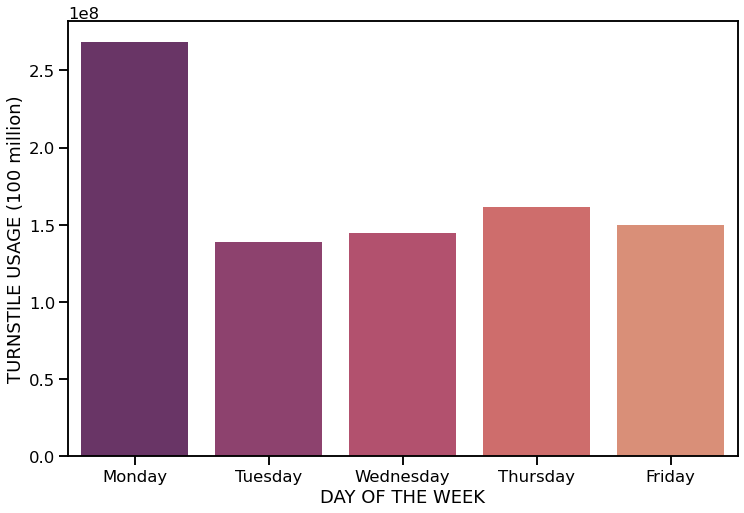

In [47]:
plt.figure(figsize=(12,8))
sns.barplot(x=overall_weekday['DAY'],y=overall_weekday['TOTAL_TRAFFIC'], palette='flare_r')
# plt.title('TOTAL MORNING TRAFFIC (ENTRIES+EXITS) BY WEEKDAY (4AM-12PM)')
plt.xlabel('DAY OF THE WEEK')
plt.ylabel('TURNSTILE USAGE (100 million)')
plt.savefig('images/total_traffic_day.jpg', bbox_inches='tight');

In [48]:
#Plot: Exit Morning Traffic by Weekday (4AM-12PM, MON-FRI)
exits_weekday = mta_weekday_am.groupby(['DAY'])['DAILY_EXITS'].sum().reset_index()
exits_weekday

,DAY,DAILY_EXITS
0,Monday,120465395.0
1,Tuesday,62404342.0
2,Wednesday,62377419.0
3,Thursday,69326613.0
4,Friday,63372072.0


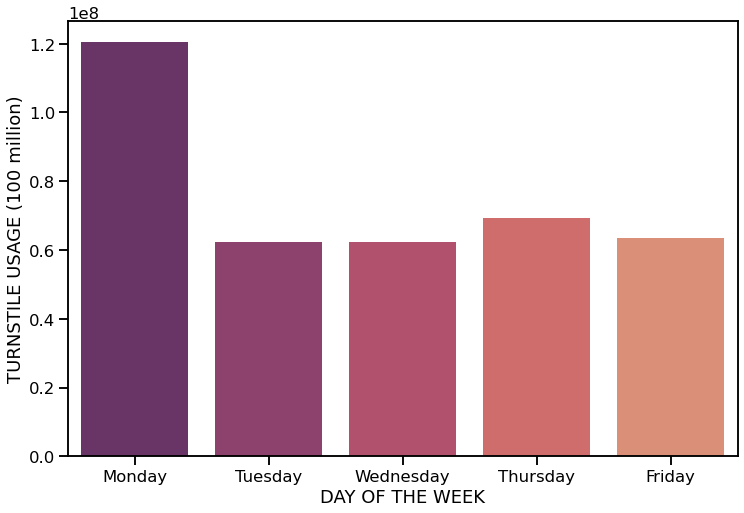

In [49]:
plt.figure(figsize=(12,8))
sns.barplot(x=exits_weekday['DAY'],y=exits_weekday['DAILY_EXITS'], palette='flare_r')
# plt.title('EXIT MORNING TRAFFIC BY WEEKDAY (4AM-12PM)')
plt.xlabel('DAY OF THE WEEK')
plt.ylabel('TURNSTILE USAGE (100 million)')
plt.savefig('images/exit_traffic_day.jpg', bbox_inches='tight');

In [50]:
#Plot: Total Morning Weekday Traffic by Station (4AM-12PM, MON-FRI)
total_traffic = mta_weekday_am.groupby(['STATION'])['TOTAL_TRAFFIC'].sum().reset_index()
total_traffic.sort_values('TOTAL_TRAFFIC', ascending=False, inplace=True, ignore_index=True)
total_traffic.head(15)

,STATION,TOTAL_TRAFFIC
0,34 ST-PENN STA,31649305.0
1,34 ST-HERALD SQ,25758629.0
2,GRD CNTRL-42 ST,20752648.0
3,23 ST,17837928.0
4,14 ST-UNION SQ,15277755.0
5,TIMES SQ-42 ST,14199507.0
6,CANAL ST,14103360.0
7,FULTON ST,13932921.0
8,42 ST-PORT AUTH,13909854.0
9,86 ST,13180903.0


In [51]:
top10_overall = total_traffic[0:10]
top10_overall

,STATION,TOTAL_TRAFFIC
0,34 ST-PENN STA,31649305.0
1,34 ST-HERALD SQ,25758629.0
2,GRD CNTRL-42 ST,20752648.0
3,23 ST,17837928.0
4,14 ST-UNION SQ,15277755.0
5,TIMES SQ-42 ST,14199507.0
6,CANAL ST,14103360.0
7,FULTON ST,13932921.0
8,42 ST-PORT AUTH,13909854.0
9,86 ST,13180903.0


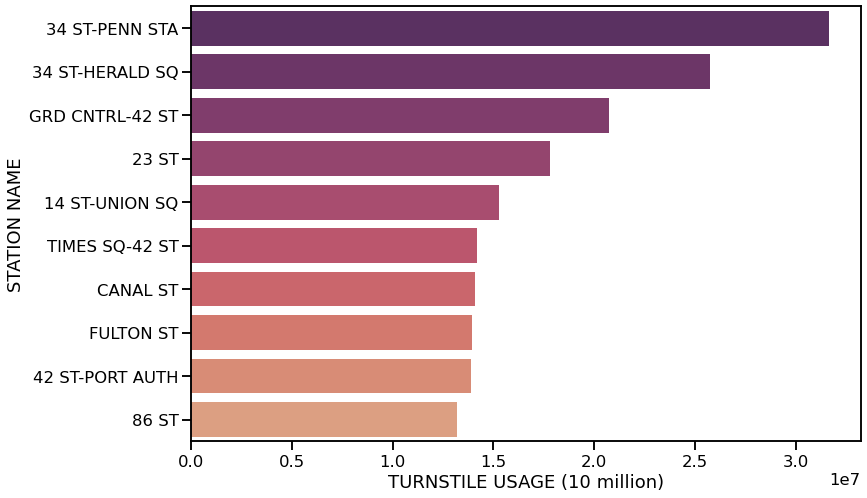

In [52]:
plt.figure(figsize=(12,8))
sns.barplot(x=top10_overall['TOTAL_TRAFFIC'],y=top10_overall['STATION'], palette='flare_r')
# plt.title('BUSIEST MTA STATIONS IN NYC (4AM-12PM, MON-FRI)')
plt.xlabel('TURNSTILE USAGE (10 million)')
plt.ylabel('STATION NAME')
plt.savefig('images/busiest_stations_weekday_mornings.jpg', bbox_inches='tight');

In [53]:
total_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATION        378 non-null    object 
 1   TOTAL_TRAFFIC  378 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.0+ KB


In [54]:
least10_overall = total_traffic[368:]
least10_overall

,STATION,TOTAL_TRAFFIC
368,CYPRESS HILLS,157538.0
369,BEACH 36 ST,146182.0
370,NEPTUNE AV,138241.0
371,BEACH 44 ST,117246.0
372,BEACH 90 ST,104998.0
373,ROCKAWAY PARK B,104382.0
374,BEACH 98 ST,64130.0
375,TOMPKINSVILLE,53792.0
376,BEACH 105 ST,33526.0
377,BROAD CHANNEL,27753.0


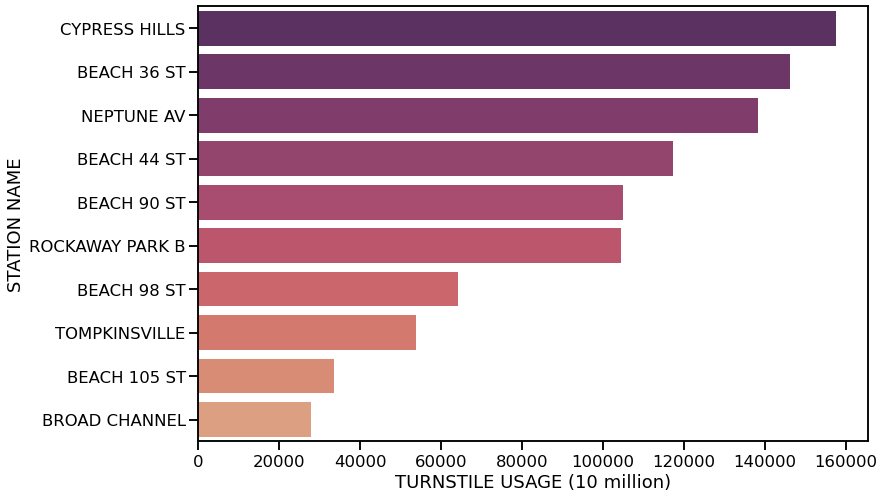

In [55]:
plt.figure(figsize=(12,8))
sns.barplot(x=least10_overall['TOTAL_TRAFFIC'],y=least10_overall['STATION'], palette='flare_r')
# plt.title('SLOWEST MTA STATIONS IN NYC (4AM-12PM, MON-FRI)')
plt.xlabel('TURNSTILE USAGE (10 million)')
plt.ylabel('STATION NAME')
plt.savefig('images/slowest_stations_weekday_mornings.jpg', bbox_inches='tight');

In [56]:
#Plot: Exit Morning Weekday Traffic by Station (4AM-12PM, MON-FRI)
total_exits = mta_weekday_am.groupby(['STATION'])['DAILY_EXITS'].sum().reset_index()
total_exits.sort_values('DAILY_EXITS', ascending=False, inplace=True, ignore_index=True)
total_exits.head(15)

,STATION,DAILY_EXITS
0,34 ST-PENN STA,13882699.0
1,34 ST-HERALD SQ,11420605.0
2,GRD CNTRL-42 ST,9786273.0
3,23 ST,8126142.0
4,FULTON ST,7169836.0
5,14 ST-UNION SQ,7035147.0
6,TIMES SQ-42 ST,6827166.0
7,PATH NEW WTC,6466644.0
8,42 ST-PORT AUTH,6041498.0
9,86 ST,6005536.0


In [57]:
top10_exits = total_exits[0:10]
top10_exits

,STATION,DAILY_EXITS
0,34 ST-PENN STA,13882699.0
1,34 ST-HERALD SQ,11420605.0
2,GRD CNTRL-42 ST,9786273.0
3,23 ST,8126142.0
4,FULTON ST,7169836.0
5,14 ST-UNION SQ,7035147.0
6,TIMES SQ-42 ST,6827166.0
7,PATH NEW WTC,6466644.0
8,42 ST-PORT AUTH,6041498.0
9,86 ST,6005536.0


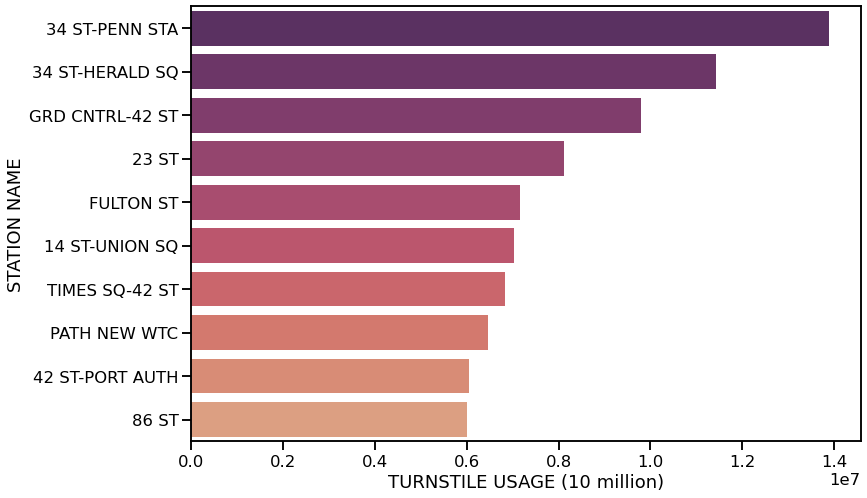

In [58]:
plt.figure(figsize=(12,8))
sns.barplot(x=top10_exits['DAILY_EXITS'],y=top10_exits['STATION'], palette='flare_r')
# plt.title('MTA STATIONS WITH MOST EXIT TRAFFIC (4AM-12PM, MON-FRI)')
plt.xlabel('TURNSTILE USAGE (10 million)')
plt.ylabel('STATION NAME')
plt.savefig('images/most_exit_traffic_weekday_mornings.jpg', bbox_inches='tight');

In [59]:
total_exits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   STATION      378 non-null    object 
 1   DAILY_EXITS  378 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.0+ KB


In [60]:
least10_exits = total_exits[368:]
least10_exits

,STATION,DAILY_EXITS
368,NEPTUNE AV,36606.0
369,BEACH 98 ST,32917.0
370,238 ST,32771.0
371,BEACH 105 ST,18376.0
372,AQUEDUCT RACETR,14020.0
373,BROAD CHANNEL,5187.0
374,RIT-ROOSEVELT,4591.0
375,RIT-MANHATTAN,3557.0
376,ST. GEORGE,202.0
377,TOMPKINSVILLE,8.0


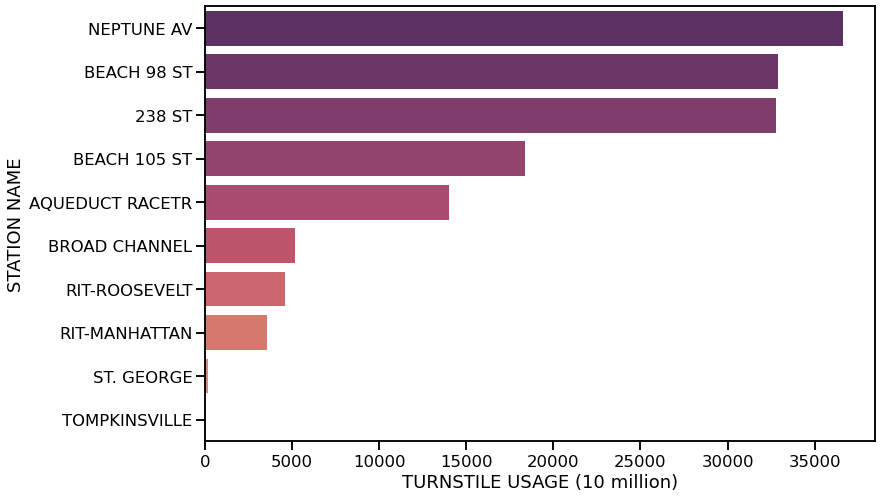

In [61]:
plt.figure(figsize=(12,8))
sns.barplot(x=least10_exits['DAILY_EXITS'],y=least10_exits['STATION'], palette='flare_r')
# plt.title('MTA STATIONS WITH LEAST EXIT TRAFFIC (4AM-12PM, MON-FRI)')
plt.xlabel('TURNSTILE USAGE (10 million)')
plt.ylabel('STATION NAME')
plt.savefig('images/least_exit_traffic_weekday_mornings.jpg', bbox_inches='tight');

# Analyzing Stations during Peak Hours (6AM-10AM, MON-FRI)

In [62]:
target_stations = ['34 ST-PENN STA', 'GRD CNTRL-42 ST', '34 ST-HERALD SQ', 'TIMES SQ-42 ST', '86 ST', '23 ST', 'FULTON ST', '14 ST-UNION SQ' '42 ST-PORT AUTH', 'PATH NEW WTC']
prelim_target = mta_weekday_am[mta_weekday_am['STATION'].isin(target_stations)].reset_index(drop=True)
prelim_target.head(5)

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,TURNSTILE,DAY,HOUR,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,TOTAL_TRAFFIC
0,R131,R190,00-00-00,23 ST,01/01/2019,04:00:00,1122621,355130,2019-01-01 04:00:00,R131-R190-00-00-00,Tuesday,4,12/31/2018,1120526.0,354445.0,2095.0,685.0,2780.0
1,R131,R190,00-00-01,23 ST,01/01/2019,04:00:00,6721966,2464600,2019-01-01 04:00:00,R131-R190-00-00-01,Tuesday,4,12/31/2018,6720381.0,2464127.0,1585.0,473.0,2058.0
2,R131,R190,00-00-02,23 ST,01/01/2019,04:00:00,14009741,5837306,2019-01-01 04:00:00,R131-R190-00-00-02,Tuesday,4,12/31/2018,14008201.0,5836657.0,1540.0,649.0,2189.0
3,R132,R190,01-00-00,23 ST,01/01/2019,04:00:00,3637276,15222185,2019-01-01 04:00:00,R132-R190-01-00-00,Tuesday,4,12/31/2018,3636985.0,15220814.0,291.0,1371.0,1662.0
4,R132,R190,01-00-01,23 ST,01/01/2019,04:00:00,6015359,7560551,2019-01-01 04:00:00,R132-R190-01-00-01,Tuesday,4,12/31/2018,6014781.0,7559902.0,578.0,649.0,1227.0


In [63]:
prelim_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83911 entries, 0 to 83910
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   C/A            83911 non-null  object        
 1   UNIT           83911 non-null  object        
 2   SCP            83911 non-null  object        
 3   STATION        83911 non-null  object        
 4   DATE           83911 non-null  object        
 5   TIME           83911 non-null  object        
 6   ENTRIES        83911 non-null  int64         
 7   EXITS          83911 non-null  int64         
 8   DATE_TIME      83911 non-null  datetime64[ns]
 9   TURNSTILE      83911 non-null  object        
 10  DAY            83911 non-null  category      
 11  HOUR           83911 non-null  int64         
 12  PREV_DATE      83911 non-null  object        
 13  PREV_ENTRIES   83911 non-null  float64       
 14  PREV_EXITS     83911 non-null  float64       
 15  DAILY_ENTRIES  8391

In [64]:
peak_hours = [6, 7, 8, 9, 10]
final_target = prelim_target[prelim_target['HOUR'].isin(peak_hours)].reset_index(drop=True)
final_target.head(5)

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,TURNSTILE,DAY,HOUR,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,TOTAL_TRAFFIC
0,A030,R083,01-00-00,23 ST,01/01/2019,07:00:00,6991120,4495227,2019-01-01 07:00:00,A030-R083-01-00-00,Tuesday,7,12/31/2018,6990209.0,4494820.0,911.0,407.0,1318.0
1,A030,R083,01-00-01,23 ST,01/01/2019,07:00:00,6659656,2459042,2019-01-01 07:00:00,A030-R083-01-00-01,Tuesday,7,12/31/2018,6659036.0,2458886.0,620.0,156.0,776.0
2,A030,R083,01-00-02,23 ST,01/01/2019,07:00:00,5016871,2349927,2019-01-01 07:00:00,A030-R083-01-00-02,Tuesday,7,12/31/2018,5016305.0,2349779.0,566.0,148.0,714.0
3,A030,R083,01-03-00,23 ST,01/01/2019,07:00:00,6276992,3034812,2019-01-01 07:00:00,A030-R083-01-03-00,Tuesday,7,12/31/2018,6276220.0,3034619.0,772.0,193.0,965.0
4,A030,R083,01-03-01,23 ST,01/01/2019,07:00:00,9622569,2954771,2019-01-01 07:00:00,A030-R083-01-03-01,Tuesday,7,12/31/2018,9621580.0,2954596.0,989.0,175.0,1164.0


In [65]:
#Plot: Exit Morning Weekday Traffic by Station (6AM-10AM, MON-FRI)
total_exits_peak_hours = final_target.groupby(['STATION'])['DAILY_EXITS'].sum().reset_index()
total_exits_peak_hours.sort_values('DAILY_EXITS', ascending=False, inplace=True, ignore_index=True)
total_exits_peak_hours.head(10)

,STATION,DAILY_EXITS
0,34 ST-PENN STA,8642514.0
1,34 ST-HERALD SQ,6155471.0
2,PATH NEW WTC,4495368.0
3,TIMES SQ-42 ST,3521164.0
4,GRD CNTRL-42 ST,3505134.0
5,FULTON ST,3295523.0
6,86 ST,2780460.0
7,23 ST,2189392.0


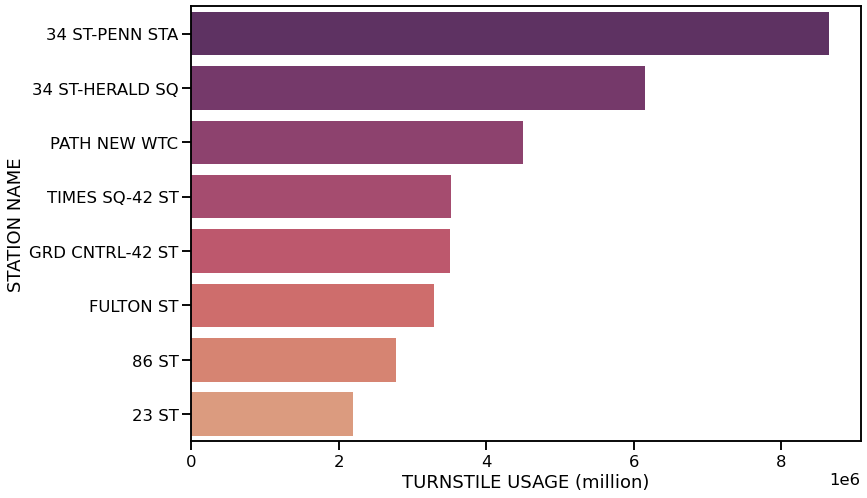

In [66]:
plt.figure(figsize=(12,8))
sns.barplot(x=total_exits_peak_hours['DAILY_EXITS'],y=total_exits_peak_hours['STATION'], palette='flare_r')
# plt.title('MTA STATIONS WITH MOST EXIT TRAFFIC (6AM-10AM, MON-FRI)')
plt.xlabel('TURNSTILE USAGE (million)')
plt.ylabel('STATION NAME')
plt.savefig('images/exit_traffic_targeted_weekday_mornings.jpg', bbox_inches='tight');

In [67]:
#Investigate: Exit Morning Traffic by Weekday (6AM-10AM, MON-FRI)
final_target.head(5)

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,TURNSTILE,DAY,HOUR,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,TOTAL_TRAFFIC
0,A030,R083,01-00-00,23 ST,01/01/2019,07:00:00,6991120,4495227,2019-01-01 07:00:00,A030-R083-01-00-00,Tuesday,7,12/31/2018,6990209.0,4494820.0,911.0,407.0,1318.0
1,A030,R083,01-00-01,23 ST,01/01/2019,07:00:00,6659656,2459042,2019-01-01 07:00:00,A030-R083-01-00-01,Tuesday,7,12/31/2018,6659036.0,2458886.0,620.0,156.0,776.0
2,A030,R083,01-00-02,23 ST,01/01/2019,07:00:00,5016871,2349927,2019-01-01 07:00:00,A030-R083-01-00-02,Tuesday,7,12/31/2018,5016305.0,2349779.0,566.0,148.0,714.0
3,A030,R083,01-03-00,23 ST,01/01/2019,07:00:00,6276992,3034812,2019-01-01 07:00:00,A030-R083-01-03-00,Tuesday,7,12/31/2018,6276220.0,3034619.0,772.0,193.0,965.0
4,A030,R083,01-03-01,23 ST,01/01/2019,07:00:00,9622569,2954771,2019-01-01 07:00:00,A030-R083-01-03-01,Tuesday,7,12/31/2018,9621580.0,2954596.0,989.0,175.0,1164.0


In [68]:
final_target.groupby(['DAY'])['DAILY_EXITS'].sum().reset_index()

,DAY,DAILY_EXITS
0,Monday,11642898.0
1,Tuesday,5081393.0
2,Wednesday,4804856.0
3,Thursday,5862944.0
4,Friday,7192935.0
